# Classification of other datasets, not used for training

In [334]:
from keras.models import load_model
import tensorflow as tf
import os
from keras.preprocessing import image
import numpy as np
import pandas as pd

In [335]:
ih, iw = 64, 64
ch = 'rgb'
model_dir = "C:/Users/Max/Documents/GitHub/DenseNet/densenet-cgan-kaggle-v015/model.h5"

In [336]:
model = load_model(model_dir)
model.compile(optimizer='adam', loss='losses.sparse_categorical_crossentropy', metrics=['accuracy'])

In [337]:
index_1 = model_dir.find('/', 30) + 1
index_2 = model_dir.find('/', index_1)
index_3 = model_dir.find('-', index_1)
model_type = model_dir[index_1:index_2]
trimmed_model_type = model_dir[index_1:index_3]

print(model_type)
print(trimmed_model_type)

densenet-cgan-kaggle-v015
densenet


In [338]:
data_dir = "C:/Users/Max/Documents/ransomware_val/bazaarImages"

data_i_1 = data_dir.find('/', 30)+1

data_type = data_dir[data_i_1:]

if data_type == 'virusshare':
    data_file_count = 4332
elif data_type == 'bazaarImages':
    data_file_count = 968
else: 
    data_file_count = 'unknown'

In [339]:
rw_imgs = np.array([])
rw_family = np.array([])
rw_labels = np.array([]).astype("int32")

b_imgs = np.array([])
b_family = np.array([])
b_labels = np.array([]).astype("int32")

imgs = np.array([])
family = np.array([])
labels = np.array([]).astype("int32")

i = 0

for root, dirs, files in os.walk(data_dir): 
    for filename in files:
        path = os.path.join(root, filename)
        img = image.load_img(path, target_size=(iw,ih), color_mode=ch, interpolation='bicubic')
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        
        images = tf.keras.applications.densenet.preprocess_input(x)
        p = model.predict(images)

        # Keep track of progress
        i = i + 1
        print(f"{i} of {data_file_count} files")
        
        # Retrieve name of software family (e.g. Reveton)
        p_i_1 = path.find('/', 30)+len(data_type)+2
        p_i_2 = path.find("\\", p_i_1)
        family_name = path[p_i_1:p_i_2]
    
        # Predicted label
        q = p.argmax()
        
        imgs = np.append(imgs, path)
        family = np.append(family, family_name)
        labels = np.append(labels, q)
        
        if np.any(p>0.5):
            if not q == 10:
                rw_imgs = np.append(rw_imgs, path)
                rw_family = np.append(rw_family, family_name)
                rw_labels = np.append(rw_labels, q)
            if q == 10:
                b_imgs = np.append(b_imgs, path)
                b_family = np.append(b_family, family_name)
                b_labels = np.append(b_labels, q)

rw_imgs_family_labels = pd.DataFrame({'file': rw_imgs, 'family': rw_family, 'label': rw_labels}, 
                                     columns=['file', 'family', 'label'])
b_imgs_family_labels = pd.DataFrame({'file': b_imgs, 'family': b_family, 'label': b_labels}, 
                                     columns=['file', 'family', 'label'])
imgs_family_labels = pd.DataFrame({'file': imgs, 'family': family, 'label': labels}, 
                                     columns=['file', 'family', 'label'])

1 of 968 files
2 of 968 files
3 of 968 files
4 of 968 files
5 of 968 files
6 of 968 files
7 of 968 files
8 of 968 files
9 of 968 files
10 of 968 files
11 of 968 files
12 of 968 files
13 of 968 files
14 of 968 files
15 of 968 files
16 of 968 files
17 of 968 files
18 of 968 files
19 of 968 files
20 of 968 files
21 of 968 files
22 of 968 files
23 of 968 files
24 of 968 files
25 of 968 files
26 of 968 files
27 of 968 files
28 of 968 files
29 of 968 files
30 of 968 files
31 of 968 files
32 of 968 files
33 of 968 files
34 of 968 files
35 of 968 files
36 of 968 files
37 of 968 files
38 of 968 files
39 of 968 files
40 of 968 files
41 of 968 files
42 of 968 files
43 of 968 files
44 of 968 files
45 of 968 files
46 of 968 files
47 of 968 files
48 of 968 files
49 of 968 files
50 of 968 files
51 of 968 files
52 of 968 files
53 of 968 files
54 of 968 files
55 of 968 files
56 of 968 files
57 of 968 files
58 of 968 files
59 of 968 files
60 of 968 files
61 of 968 files
62 of 968 files
63 of 968 files
6

492 of 968 files
493 of 968 files
494 of 968 files
495 of 968 files
496 of 968 files
497 of 968 files
498 of 968 files
499 of 968 files
500 of 968 files
501 of 968 files
502 of 968 files
503 of 968 files
504 of 968 files
505 of 968 files
506 of 968 files
507 of 968 files
508 of 968 files
509 of 968 files
510 of 968 files
511 of 968 files
512 of 968 files
513 of 968 files
514 of 968 files
515 of 968 files
516 of 968 files
517 of 968 files
518 of 968 files
519 of 968 files
520 of 968 files
521 of 968 files
522 of 968 files
523 of 968 files
524 of 968 files
525 of 968 files
526 of 968 files
527 of 968 files
528 of 968 files
529 of 968 files
530 of 968 files
531 of 968 files
532 of 968 files
533 of 968 files
534 of 968 files
535 of 968 files
536 of 968 files
537 of 968 files
538 of 968 files
539 of 968 files
540 of 968 files
541 of 968 files
542 of 968 files
543 of 968 files
544 of 968 files
545 of 968 files
546 of 968 files
547 of 968 files
548 of 968 files
549 of 968 files
550 of 968 fil

In [340]:
save_dir = f"C:/Users/Max/Documents/validation_runs/{data_type}_{model_type}"
try:
    os.makedirs(save_dir)
except:
    print("Folder already exists! Do you want to continue?")
    input("Press 'Enter' to continue")

rw_imgs_family_labels.to_csv(path_or_buf=f"{save_dir}/rw_{data_type}_{model_type}.csv")
b_imgs_family_labels.to_csv(path_or_buf=f"{save_dir}/b_{data_type}_{model_type}.csv")
imgs_family_labels.to_csv(path_or_buf=f"{save_dir}/{data_type}_{model_type}.csv")

# Analysis

In [341]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score
from prettytable import PrettyTable, MSWORD_FRIENDLY
import seaborn as sns

In [342]:
y_predbin = []
y_truebin = []

for count, value in enumerate(labels):
    y_truebin.append(0)
    if labels[count] in range(10):
        y_predbin.append(0)
        
    else: y_predbin.append(1)
    

In [343]:
labels

array([ 8, 10,  3,  3, 10,  5,  8,  3,  5, 10, 10,  8,  3,  5,  3, 10, 10,
        3,  3,  3, 10,  3, 10, 10, 10, 10,  3,  8,  3,  3,  3,  5, 10,  3,
       10,  3, 10, 10,  3, 10, 10,  5,  3, 10,  5, 10,  3,  3, 10, 10,  5,
       10,  8, 10,  8,  3,  3, 10,  0,  3,  3,  3, 10,  5,  8, 10,  3,  3,
        3,  3, 10,  3, 10,  3,  3,  3,  3,  3,  3,  3,  3, 10,  3,  3, 10,
        3,  3, 10,  3, 10,  5,  3,  3,  3,  3,  3,  3, 10, 10,  3,  5, 10,
        3,  3,  3,  8,  8,  5,  3,  3,  3,  3,  3, 10,  3, 10,  3,  8,  3,
        3,  3,  3,  3, 10,  3, 10,  3,  3,  3,  3,  3,  8,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  8,  3,  3, 10,  3,  3,  3,  3,
        3,  3, 10,  3,  3,  3,  3,  3,  5,  3,  3,  3,  3,  3, 10,  3,  3,
        3,  3,  3, 10,  3,  3,  3,  3,  3,  3,  3,  3, 10,  3,  3,  3,  3,
        3,  3, 10,  3,  3,  3,  3,  3,  3, 10,  3,  3,  3,  3,  3,  3,  3,
        3, 10,  3,  3,  3,  3, 10,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [344]:
print(np.unique(labels, return_counts=True))

(array([ 0,  2,  3,  5,  8,  9, 10], dtype=int64), array([  2,   2, 253,  82, 241, 104, 284], dtype=int64))


In [345]:
c_matrix_bin = metrics.confusion_matrix(y_truebin, y_predbin)

In [346]:
def confusion_matrix_bin(confusion_matrix, class_names_bin, figsize = (5,2), fontsize=7):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names_bin, columns=class_names_bin, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"{model_type}")
    plt.savefig(f"C:/Users/Max/Documents/validation_runs/visuals/CM_{data_type}_{model_type}.png", bbox_inches = 'tight')
    plt.savefig(f"{save_dir}/CM_{data_type}_{model_type}.png", bbox_inches = 'tight')

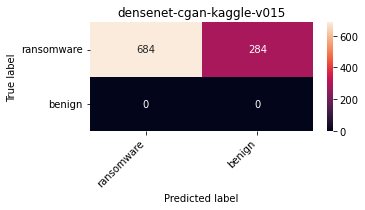

In [347]:
class_names_bin= ("ransomware", "benign")
confusion_matrix_bin(c_matrix_bin, class_names_bin, figsize = (5,2), fontsize=10)

**Performance per family**

In [348]:
fam_labels = pd.DataFrame(imgs_family_labels, columns=['family', 'label'])
fam_labels['label'] = fam_labels['label'].astype('str')

In [349]:
for count, value in enumerate(fam_labels['label'].values):
    if int(fam_labels['label'].values[count]) in range(10):
        fam_labels['label'].values[count] = 'ransomware'
    else:
        fam_labels['label'].values[count] = 'benign'

In [350]:
fam_labels['label'].values

array(['ransomware', 'benign', 'ransomware', 'ransomware', 'benign',
       'ransomware', 'ransomware', 'ransomware', 'ransomware', 'benign',
       'benign', 'ransomware', 'ransomware', 'ransomware', 'ransomware',
       'benign', 'benign', 'ransomware', 'ransomware', 'ransomware',
       'benign', 'ransomware', 'benign', 'benign', 'benign', 'benign',
       'ransomware', 'ransomware', 'ransomware', 'ransomware',
       'ransomware', 'ransomware', 'benign', 'ransomware', 'benign',
       'ransomware', 'benign', 'benign', 'ransomware', 'benign', 'benign',
       'ransomware', 'ransomware', 'benign', 'ransomware', 'benign',
       'ransomware', 'ransomware', 'benign', 'benign', 'ransomware',
       'benign', 'ransomware', 'benign', 'ransomware', 'ransomware',
       'ransomware', 'benign', 'ransomware', 'ransomware', 'ransomware',
       'ransomware', 'benign', 'ransomware', 'ransomware', 'benign',
       'ransomware', 'ransomware', 'ransomware', 'ransomware', 'benign',
       'ransomwa

In [351]:
df = fam_labels.value_counts(sort=False)

<AxesSubplot:xlabel='family'>

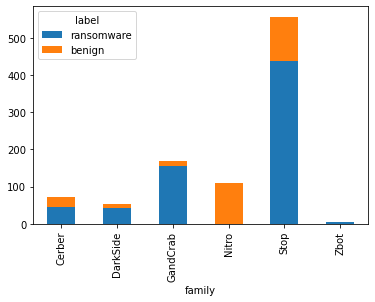

In [352]:
df.unstack().plot(kind = 'bar', stacked=True, y=['ransomware', 'benign'])

In [353]:
dfu = df.unstack()

In [354]:
df.unstack()

label,benign,ransomware
family,,
Cerber,28.0,45.0
DarkSide,11.0,43.0
GandCrab,14.0,155.0
Nitro,110.0,NaN
Stop,120.0,437.0
Zbot,1.0,4.0


In [355]:
for count, label in enumerate(dfu['benign']):
    total = dfu['benign'][count] + dfu['ransomware'][count]
    dfu['benign'][count] = dfu['benign'][count] / total * 100
    dfu['ransomware'][count] = dfu['ransomware'][count] / total * 100
    
    if pd.isna(dfu['benign'][count]):
        dfu['benign'][count] = 0
        dfu['ransomware'][count] = 100
    if pd.isna(dfu['ransomware'][count]):
        dfu['ransomware'][count] = 0
        dfu['benign'][count] = 100

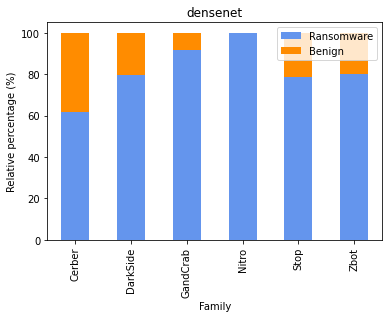

In [356]:
per_distr = dfu.plot(kind = 'bar', stacked=True, y=['ransomware', 'benign'], color = ['cornflowerblue', 'darkorange'])
plt.legend(['Ransomware', 'Benign'])
plt.xlabel('Family')
plt.ylabel('Relative percentage (%)')
plt.title(trimmed_model_type)
plt.savefig(f"{save_dir}/BP_{data_type}_{model_type}.png", bbox_inches = 'tight')
plt.savefig(f"C:/Users/Max/Documents/validation_runs/visuals/BP_{data_type}_{model_type}.png", bbox_inches = 'tight')